In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit

In [116]:
# Exposure time = 60s

bias = []
for i in range(1,10):
    bias.append(fits.getdata("kBias0000000{}.fit".format(i) , ext=0).astype(np.int))

bias.append(fits.getdata("kBias00000010.fit".format(i) , ext=0).astype(np.int))
    
flats = []
for i in range(11,21):
    flats.append(fits.getdata("kFlatField000000{}.fit".format(i) , ext=0).astype(np.int))

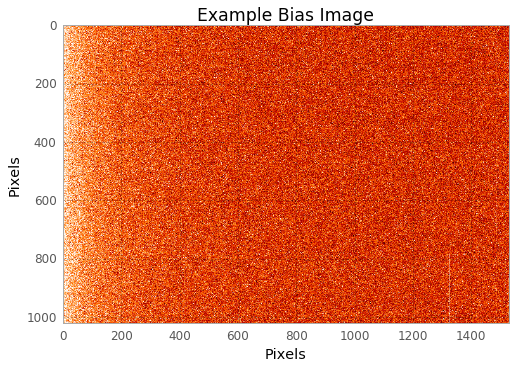

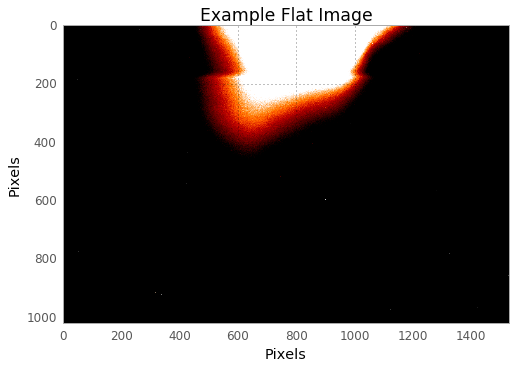

In [117]:
plt.imshow(bias[0], vmin=1000, vmax = 1040)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.title('Example Bias Image')
plt.show()

plt.imshow(flats[0], vmin=3300, vmax = 4000)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.title('Example Flat Image')
plt.show()

In [118]:
mean_bias = np.asarray(bias).mean(axis=0)
flat_minus_bias = [half - mean_bias for half in flats]

var_slice = np.asarray(flat_minus_bias).var(axis=0)
mean_slice = np.asarray(flat_minus_bias).mean(axis=0)

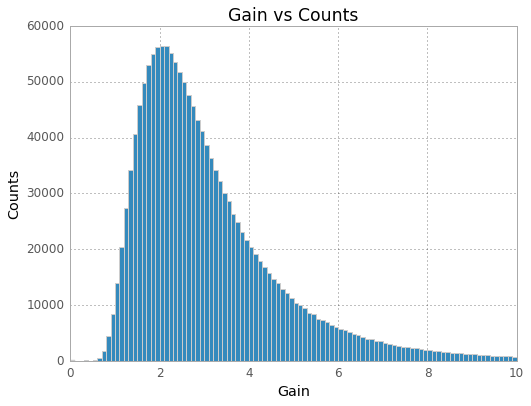

2.0


In [119]:
gain = mean_slice / var_slice

n, b, patches = plt.hist(gain.flatten(), 100, range=(0,10))
plt.xlabel('Gain')
plt.ylabel('Counts')
plt.title('Gain vs Counts')
plt.show()

gain_max = np.where(n == n.max())
print (b[gain_max][0])
gain_max = b[gain_max][0]

In [133]:
var_bias = np.asarray(bias).std(axis=0)
mean_var_bias = var_bias.mean()
RN = gain_max * mean_var_bias

print (RN)

11.303307776


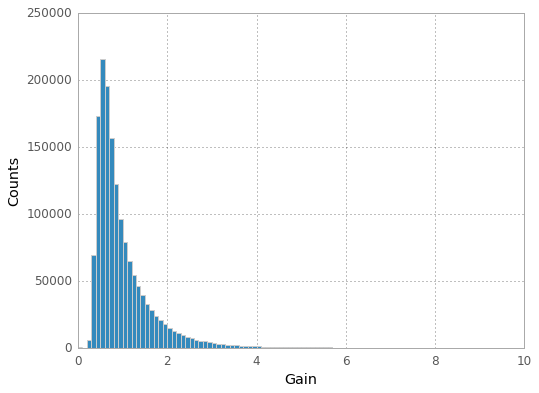

0.5
2.82868671701


In [134]:
# Exposure time = 150s

abias = []
for i in range(1,10):
    abias.append(fits.getdata("aBias0000000{}.fit".format(i) , ext=0).astype(np.int))

abias.append(fits.getdata("aBias00000010.fit".format(i) , ext=0).astype(np.int))
    
aflats = []
for i in range(11,21):
    aflats.append(fits.getdata("aFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    

amean_bias = np.asarray(abias).mean(axis=0)
aflat_minus_bias = [half - amean_bias for half in aflats]

avar_slice = np.asarray(aflat_minus_bias).var(axis=0)
amean_slice = np.asarray(aflat_minus_bias).mean(axis=0)


again = amean_slice / avar_slice

n, b, patches = plt.hist(again.flatten(), 100, range=(0,10))
plt.xlabel('Gain')
plt.ylabel('Counts')
plt.show()

again_max = np.where(n == n.max())
print (b[again_max][0])
again_max = b[again_max][0]


avar_bias = np.asarray(abias).std(axis=0)
amean_var_bias = avar_bias.mean()
aRN = again_max * amean_var_bias

print (aRN)

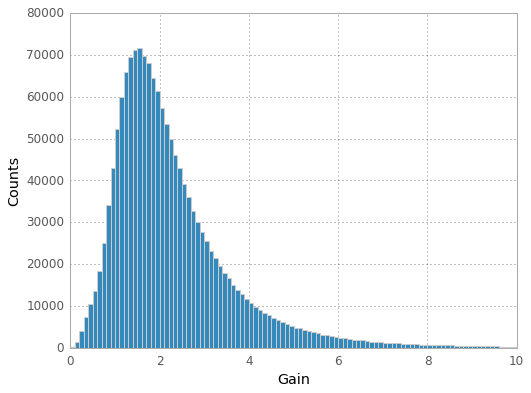

1.5
8.51321273032


In [135]:
# Exposure time = 60

mbias = []
for i in range(1,10):
    mbias.append(fits.getdata("mBias0000000{}.fit".format(i) , ext=0).astype(np.int))

mbias.append(fits.getdata("mBias00000010.fit".format(i) , ext=0).astype(np.int))
    
mflats = []
for i in range(11,21):
    mflats.append(fits.getdata("mFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    

mmean_bias = np.asarray(mbias).mean(axis=0)
mflat_minus_bias = [half - mmean_bias for half in mflats]

mvar_slice = np.asarray(mflat_minus_bias).var(axis=0)
mmean_slice = np.asarray(mflat_minus_bias).mean(axis=0)


mgain = mmean_slice / mvar_slice

n, b, patches = plt.hist(mgain.flatten(), 100, range=(0,10))
plt.xlabel('Gain')
plt.ylabel('Counts')
plt.show()

mgain_max = np.where(n == n.max())
print (b[mgain_max][0])
mgain_max = b[mgain_max][0]


mvar_bias = np.asarray(mbias).std(axis=0)
mmean_var_bias = mvar_bias.mean()
mRN = mgain_max * mmean_var_bias

print (mRN)

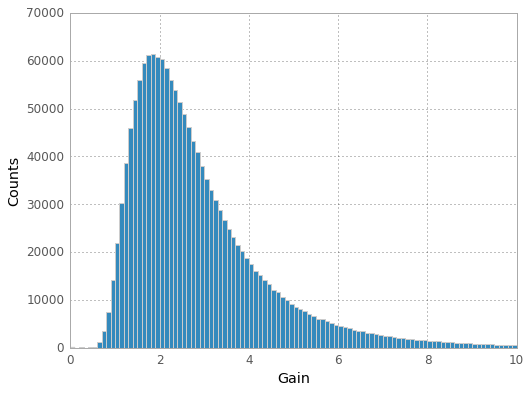

1.8
10.1741911435


In [136]:
# Exposure time = 100s

Qbias = []
for i in range(1,10):
    Qbias.append(fits.getdata("QBias0000000{}.fit".format(i) , ext=0).astype(np.int))

Qbias.append(fits.getdata("QBias00000010.fit".format(i) , ext=0).astype(np.int))
    
Qflats = []
for i in range(11,21):
    Qflats.append(fits.getdata("QFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    

Qmean_bias = np.asarray(Qbias).mean(axis=0)
Qflat_minus_bias = [half - Qmean_bias for half in Qflats]

Qvar_slice = np.asarray(Qflat_minus_bias).var(axis=0)
Qmean_slice = np.asarray(Qflat_minus_bias).mean(axis=0)


Qgain = Qmean_slice / Qvar_slice

n, b, patches = plt.hist(Qgain.flatten(), 100, range=(0,10))
plt.xlabel('Gain')
plt.ylabel('Counts')
plt.show()

Qgain_max = np.where(n == n.max())
print (b[Qgain_max][0])
Qgain_max = b[Qgain_max][0]


Qvar_bias = np.asarray(Qbias).std(axis=0)
Qmean_var_bias = Qvar_bias.mean()
QRN = Qgain_max * Qmean_var_bias

print (QRN)

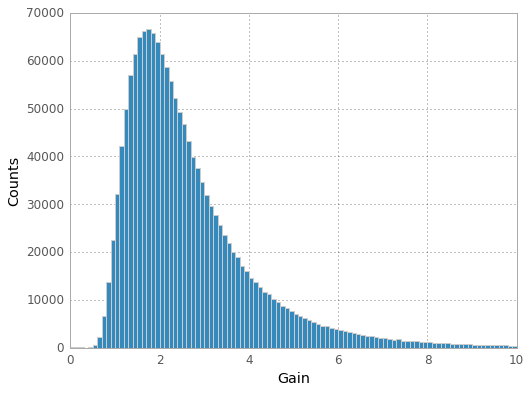

1.7
9.6220664574


In [137]:
# Exposure time = 75s

Sbias = []
for i in range(1,10):
    Sbias.append(fits.getdata("SBias0000000{}.fit".format(i) , ext=0).astype(np.int))

Sbias.append(fits.getdata("SBias00000010.fit".format(i) , ext=0).astype(np.int))
    
Sflats = []
for i in range(11,21):
    Sflats.append(fits.getdata("SFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    

Smean_bias = np.asarray(Sbias).mean(axis=0)
Sflat_minus_bias = [half - Smean_bias for half in Sflats]

Svar_slice = np.asarray(Sflat_minus_bias).var(axis=0)
Smean_slice = np.asarray(Sflat_minus_bias).mean(axis=0)


Sgain = Smean_slice / Svar_slice

n, b, patches = plt.hist(Sgain.flatten(), 100, range=(0,10))
plt.xlabel('Gain')
plt.ylabel('Counts')
plt.show()

Sgain_max = np.where(n == n.max())
print (b[Sgain_max][0])
Sgain_max = b[Sgain_max][0]


Svar_bias = np.asarray(Sbias).std(axis=0)
Smean_var_bias = Svar_bias.mean()
SRN = Sgain_max * Smean_var_bias

print (SRN)

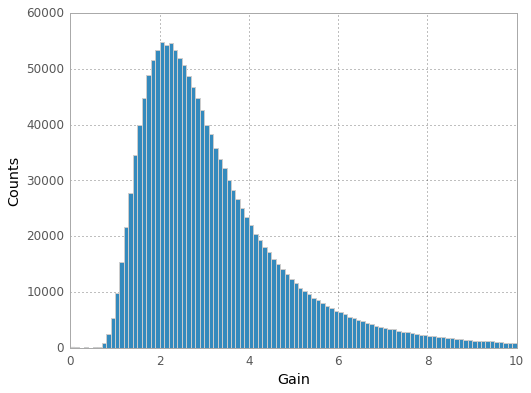

2.0
11.3131245172


In [138]:
# Exposure time = 120s

Tbias = []
for i in range(1,10):
    Tbias.append(fits.getdata("TBias0000000{}.fit".format(i) , ext=0).astype(np.int))

Tbias.append(fits.getdata("TBias00000010.fit".format(i) , ext=0).astype(np.int))
    
Tflats = []
for i in range(11,21):
    Tflats.append(fits.getdata("TFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    

Tmean_bias = np.asarray(Tbias).mean(axis=0)
Tflat_minus_bias = [half - Tmean_bias for half in Tflats]

Tvar_slice = np.asarray(Tflat_minus_bias).var(axis=0)
Tmean_slice = np.asarray(Tflat_minus_bias).mean(axis=0)


Tgain = Tmean_slice / Tvar_slice

n, b, patches = plt.hist(Tgain.flatten(), 100, range=(0,10))
plt.xlabel('Gain')
plt.ylabel('Counts')
plt.show()

Tgain_max = np.where(n == n.max())
print (b[Tgain_max][0])
Tgain_max = b[Tgain_max][0]


Tvar_bias = np.asarray(Tbias).std(axis=0)
Tmean_var_bias = Tvar_bias.mean()
TRN = Tgain_max * Tmean_var_bias

print (TRN)

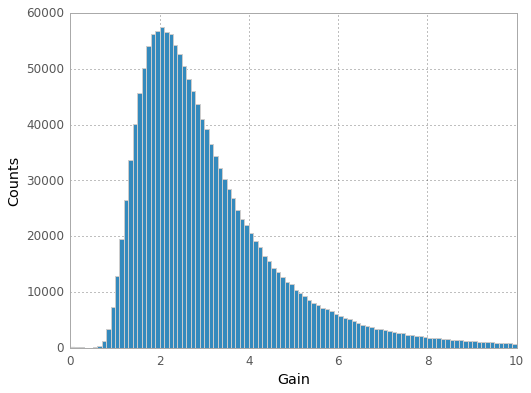

2.0
11.3065684861


In [147]:
# Exposure time = 90s

lbias = []
for i in range(1,10):
    lbias.append(fits.getdata("lBias0000000{}.fit".format(i) , ext=0).astype(np.int))

lbias.append(fits.getdata("lBias00000010.fit".format(i) , ext=0).astype(np.int))
    
lflats = []
for i in range(11,21):
    lflats.append(fits.getdata("lFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    

lmean_bias = np.asarray(lbias).mean(axis=0)
lflat_minus_bias = [half - lmean_bias for half in lflats]

lvar_slice = np.asarray(lflat_minus_bias).var(axis=0)
lmean_slice = np.asarray(lflat_minus_bias).mean(axis=0)

lgain = lmean_slice / lvar_slice

n, b, patches = plt.hist(lgain.flatten(), 100, range=(0,10))
plt.xlabel('Gain')
plt.ylabel('Counts')
plt.show()

lgain_max = np.where(n == n.max())
print (b[lgain_max][0])
lgain_max = b[lgain_max][0]


lvar_bias = np.asarray(lbias).std(axis=0)
lmean_var_bias = lvar_bias.mean()
lRN = lgain_max * lmean_var_bias

print (lRN)

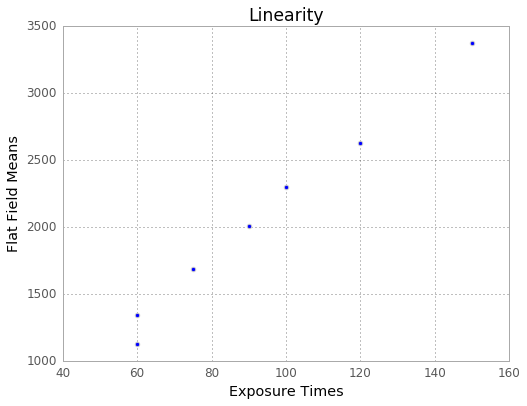

In [150]:
mean_slice = np.asarray(flat_minus_bias).mean()
amean_slice = np.asarray(aflat_minus_bias).mean()
mmean_slice = np.asarray(mflat_minus_bias).mean()
Qmean_slice = np.asarray(Qflat_minus_bias).mean()
Smean_slice = np.asarray(Sflat_minus_bias).mean()
Tmean_slice = np.asarray(Tflat_minus_bias).mean()
lmean_slice = np.asarray(lflat_minus_bias).mean()

flat_means = [mean_slice, amean_slice, mmean_slice, Qmean_slice, Smean_slice, Tmean_slice, lmean_slice]
exp_times = [60, 150, 60, 100, 75, 120, 90]

plt.scatter(exp_times, flat_means)
plt.xlabel('Exposure Times')
plt.ylabel('Flat Field Means')
plt.title('Linearity')
plt.show()

In [128]:
bias_14_1 = fits.getdata("kBias00000021.fit".format(i) , ext=0).astype(np.int)
bias_14_2 = fits.getdata("kBias00000022.fit".format(i) , ext=0).astype(np.int)
bias_10_1 = fits.getdata("kBias00000027.fit".format(i) , ext=0).astype(np.int)
bias_10_2 = fits.getdata("kBias00000028.fit".format(i) , ext=0).astype(np.int)
bias_6_1 = fits.getdata("kBias00000029.fit".format(i) , ext=0).astype(np.int)
bias_6_2 = fits.getdata("kBias00000030.fit".format(i) , ext=0).astype(np.int)
bias_2_1 = fits.getdata("kBias00000035.fit".format(i) , ext=0).astype(np.int)
bias_2_2 = fits.getdata("kBias00000036.fit".format(i) , ext=0).astype(np.int)
bias_neg2_1 = fits.getdata("kBias00000037.fit".format(i) , ext=0).astype(np.int)
bias_neg2_2 = fits.getdata("kBias00000038.fit".format(i) , ext=0).astype(np.int)

dark_14_1 = fits.getdata("kDark00000023.fit".format(i) , ext=0).astype(np.int)
dark_14_2 = fits.getdata("kDark00000024.fit".format(i) , ext=0).astype(np.int)
dark_10_1 = fits.getdata("kDark00000025.fit".format(i) , ext=0).astype(np.int)
dark_10_2 = fits.getdata("kDark00000026.fit".format(i) , ext=0).astype(np.int)
dark_6_1 = fits.getdata("kDark00000031.fit".format(i) , ext=0).astype(np.int)
dark_6_2 = fits.getdata("kDark00000032.fit".format(i) , ext=0).astype(np.int)
dark_2_1 = fits.getdata("kDark00000033.fit".format(i) , ext=0).astype(np.int)
dark_2_2 = fits.getdata("kDark00000034.fit".format(i) , ext=0).astype(np.int)
dark_neg2_1 = fits.getdata("kDark00000039.fit".format(i) , ext=0).astype(np.int)
dark_neg2_2 = fits.getdata("kDark00000040.fit".format(i) , ext=0).astype(np.int)

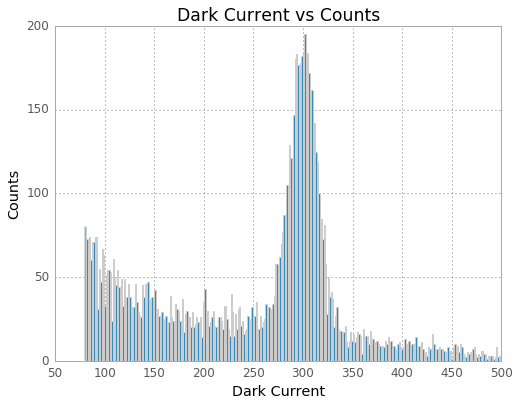

In [151]:
bias_14 = [bias_14_1, bias_14_2]
bias_10 = [bias_10_1, bias_10_2]
bias_6 = [bias_6_1, bias_6_2]
bias_2 = [bias_2_1, bias_2_2]
bias_neg2 = [bias_neg2_1, bias_neg2_2]

mean_bias_14 = np.asarray(bias_14).mean(axis=0)
mean_bias_10 = np.asarray(bias_10).mean(axis=0)
mean_bias_6 = np.asarray(bias_6).mean(axis=0)
mean_bias_2 = np.asarray(bias_2).mean(axis=0)
mean_bias_neg2 = np.asarray(bias_neg2).mean(axis=0)

corrected_darks = []
corrected_darks.append(dark_14_1 - mean_bias_14)
corrected_darks.append(dark_14_2 - mean_bias_14)
corrected_darks.append(dark_10_1 - mean_bias_14)
corrected_darks.append(dark_10_2 - mean_bias_14)
corrected_darks.append(dark_6_1 - mean_bias_14)
corrected_darks.append(dark_6_2 - mean_bias_14)
corrected_darks.append(dark_2_1 - mean_bias_14)
corrected_darks.append(dark_2_2 - mean_bias_14)
corrected_darks.append(dark_neg2_1 - mean_bias_14)
corrected_darks.append(dark_neg2_2 - mean_bias_14)

n, b, patches = plt.hist(corrected_darks[5].flatten(), 300, range=(80,500))
#plt.axvline(x = 27)
plt.xlabel('Dark Current')
plt.ylabel('Counts')
plt.title('Dark Current vs Counts')
plt.show()

In [130]:
corrected_darks[0] = np.asarray(corrected_darks[0][np.where(corrected_darks[0] <= 150)]).mean() * gain_max / 60.
corrected_darks[1] = np.asarray(corrected_darks[1][np.where(corrected_darks[1] <= 150)]).mean() * gain_max / 60.
corrected_darks[2] = np.asarray(corrected_darks[2][np.where(corrected_darks[2] <= 300)]).mean() * gain_max / 60.
corrected_darks[3] = np.asarray(corrected_darks[3][np.where(corrected_darks[3] <= 300)]).mean() * gain_max / 60.
corrected_darks[4] = np.asarray(corrected_darks[4][np.where(corrected_darks[4] <= 200)]).mean() * gain_max / 60.
corrected_darks[5] = np.asarray(corrected_darks[5][np.where(corrected_darks[5] <= 200)]).mean() * gain_max / 60.
corrected_darks[6] = np.asarray(corrected_darks[6][np.where(corrected_darks[6] <= 150)]).mean() * gain_max / 60.
corrected_darks[7] = np.asarray(corrected_darks[7][np.where(corrected_darks[7] <= 150)]).mean() * gain_max / 60.
corrected_darks[8] = np.asarray(corrected_darks[8][np.where(corrected_darks[8] <= 100)]).mean() * gain_max / 60.
corrected_darks[9] = np.asarray(corrected_darks[9][np.where(corrected_darks[9] <= 100)]).mean() * gain_max / 60.

A=1.68707256195e+27, E_g=3.5296593799, c=0.229086154661


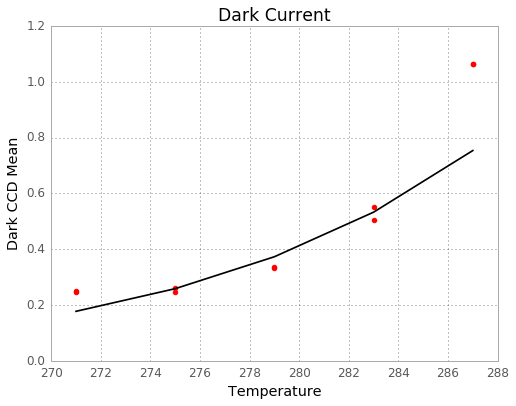

In [132]:
temps = [287, 287, 283, 283, 279, 279, 275, 275, 271, 271]
temps = np.asarray(temps)

E_g = 1.14 #1.778416 * 10**(-19)
a = 10**(6.2)
k = 8.617 * 10**(-5) #1.38 * 10**(-23)
c = 0

def func (temps, a, E_g, c):
    return a * temps**(3.0/2.0) * np.exp((-E_g)/(2*k*temps)) + c

coeff, pcov = curve_fit(func, temps, corrected_darks, p0=(a, E_g, c), maxfev = 1000000)
print ("A=%s, E_g=%s, c=%s" % (coeff[0], coeff[1], coeff[2]))

plt.scatter(temps, corrected_darks, color = 'r')
plt.plot(temps, func(temps, a, E_g, c), color = 'k')
plt.xlabel('Temperature')
plt.ylabel('Dark CCD Mean')
plt.title('Dark Current')
plt.show()